https://courses.edx.org/courses/course-v1:MITx+15.071x_3+1T2016/courseware/78a8f19e5e54432a938ae62dc0246780/9aa8c6526c104cbc946e510fb9bd05af/

In [1]:
tweets = read.csv("tweets.csv", stringsAsFactors = FALSE)

In [2]:
str(tweets)

'data.frame':	1181 obs. of  2 variables:
 $ Tweet: chr  "I have to say, Apple has by far the best customer care service I have ever received! @Apple @AppStore" "iOS 7 is so fricking smooth & beautiful!! #ThanxApple @Apple" "LOVE U @APPLE" "Thank you @apple, loving my new iPhone 5S!!!!!  #apple #iphone5S pic.twitter.com/XmHJCU4pcb" ...
 $ Avg  : num  2 2 1.8 1.8 1.8 1.8 1.8 1.6 1.6 1.6 ...


In [3]:
tweets$Negative = as.factor(tweets$Avg <= -1)

In [4]:
table(tweets$Negative)


FALSE  TRUE 
  999   182 

In [ ]:
# Install package tm, SnowballC

In [9]:
Sys.setlocale("LC_ALL", "C")

[1] "LC_CTYPE=C;LC_NUMERIC=C;LC_TIME=C;LC_COLLATE=C;LC_MONETARY=C;LC_MESSAGES=en_IN;LC_PAPER=en_IN;LC_NAME=C;LC_ADDRESS=C;LC_TELEPHONE=C;LC_MEASUREMENT=en_IN;LC_IDENTIFICATION=C"

In [14]:
library(tm)

In [15]:
library(SnowballC)

In [18]:
corpus = Corpus(VectorSource(tweets$Tweet))

In [19]:
corpus

<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 0
Content:  documents: 1181

In [20]:
corpus[[1]]$content

[1] "I have to say, Apple has by far the best customer care service I have ever received! @Apple @AppStore"

In [21]:
corpus = tm_map(corpus,tolower)

In [22]:
corpus

<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 0
Content:  documents: 1181

In [24]:
corpus[[1]]

[1] "i have to say, apple has by far the best customer care service i have ever received! @apple @appstore"

In [25]:
#Convert to plain text
corpus = tm_map(corpus, PlainTextDocument)

In [27]:
corpus[[1]]$content

[1] "i have to say, apple has by far the best customer care service i have ever received! @apple @appstore"

In [28]:
corpus = tm_map(corpus, removePunctuation)

In [29]:
corpus

<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 0
Content:  documents: 1181

In [30]:
corpus[[1]]$content

[1] "i have to say apple has by far the best customer care service i have ever received apple appstore"

In [31]:
stopwords("english")[1:10]

[1] "i"         "me"        "my"        "myself"    "we"        "our"      
 [7] "ours"      "ourselves" "you"       "your"

In [32]:
corpus = tm_map(corpus, removeWords, c("apple",stopwords("english")))

In [33]:
corpus[[1]]$content

[1] "   say    far  best customer care service   ever received  appstore"

In [34]:
corpus = tm_map(corpus, stemDocument)

In [35]:
corpus[[1]]$content

[1] "   say    far  best custom care servic   ever receiv  appstor"

In [36]:
frequencies = DocumentTermMatrix(corpus)

In [37]:
frequencies

<<DocumentTermMatrix (documents: 1181, terms: 3289)>>
Non-/sparse entries: 8980/3875329
Sparsity           : 100%
Maximal term length: 115
Weighting          : term frequency (tf)

In [39]:
inspect(frequencies[1000:1005,505:515])

<<DocumentTermMatrix (documents: 6, terms: 11)>>
Non-/sparse entries: 1/65
Sparsity           : 98%
Maximal term length: 9
Weighting          : term frequency (tf)

              Terms
Docs           cheapen cheaper check cheep cheer cheerio cherylcol chief
  character(0)       0       0     0     0     0       0         0     0
  character(0)       0       0     0     0     0       0         0     0
  character(0)       0       0     0     0     0       0         0     0
  character(0)       0       0     0     0     0       0         0     0
  character(0)       0       0     0     0     0       0         0     0
  character(0)       0       0     0     0     1       0         0     0
              Terms
Docs           chiiiiqu child children
  character(0)        0     0        0
  character(0)        0     0        0
  character(0)        0     0        0
  character(0)        0     0        0
  character(0)        0     0        0
  character(0)        0     0        0


In [40]:
findFreqTerms(frequencies, lowfreq = 20)

[1] "android"              "anyon"                "app"                 
 [4] "appl"                 "back"                 "batteri"             
 [7] "better"               "buy"                  "can"                 
[10] "cant"                 "come"                 "dont"                
[13] "fingerprint"          "freak"                "get"                 
[16] "googl"                "ios7"                 "ipad"                
[19] "iphon"                "iphone5"              "iphone5c"            
[22] "ipod"                 "ipodplayerpromo"      "itun"                
[25] "just"                 "like"                 "lol"                 
[28] "look"                 "love"                 "make"                
[31] "market"               "microsoft"            "need"                
[34] "new"                  "now"                  "one"                 
[37] "phone"                "pleas"                "promo"               
[40] "promoipodplayerpromo" "realli"               "releas"              
[43] "samsung"              "say"                  "store"               
[46] "thank"                "think"                "time"                
[49] "twitter"              "updat"                "use"                 
[52] "via"                  "want"                 "well"                
[55] "will"                 "work"


    The sparsity threshold works as follows.
    If we say 0.98, this means to only keep
    terms that appear in 2% or more of the tweets.
    If we say 0.99, that means to only keep
    terms that appear in 1% or more of the tweets.
    If we say 0.995, that means to only keep
    terms that appear in 0.5% or more of the tweets,


In [41]:
sparse = removeSparseTerms(frequencies, 0.995)

In [42]:
sparse

<<DocumentTermMatrix (documents: 1181, terms: 309)>>
Non-/sparse entries: 4669/360260
Sparsity           : 99%
Maximal term length: 20
Weighting          : term frequency (tf)

In [43]:
tweetsSparse = as.data.frame(as.matrix(sparse))

In [44]:
colnames(tweetsSparse) = make.names(colnames(tweetsSparse))

In [45]:
nrow(tweetsSparse)

[1] 1181

In [46]:
nrow(tweets)

[1] 1181

In [47]:
tweetsSparse$Negative = tweets$Negative

In [48]:
library(caTools)

In [49]:
set.seed(123)
split = sample.split(tweetsSparse$Negative, SplitRatio = 0.7)

In [52]:
trainSparse = subset(tweetsSparse, split == TRUE)
testSparse = subset(tweetsSparse, split == FALSE)

In [53]:
findFreqTerms(frequencies, lowfreq = 100)

[1] "iphon" "itun"  "new"

In [54]:
library(rpart)

In [55]:
library(rpart.plot)

Warning message:
: package 'rpart.plot' was built under R version 3.3.0

In [56]:
tweetCART = rpart(Negative~., data = trainSparse, method = "class")

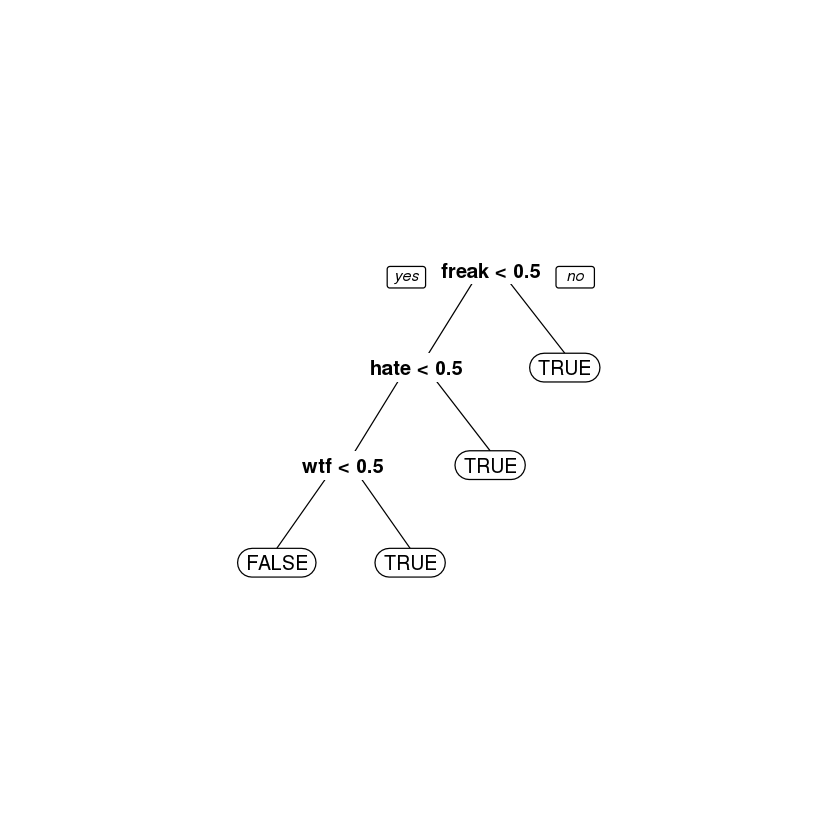

In [57]:
prp(tweetCART)

In [58]:
predictCART = predict(tweetCART, newdata = testSparse, type = "class")

In [59]:
t = table(testSparse$Negative,predictCART)
t

       predictCART
        FALSE TRUE
  FALSE   294    6
  TRUE     37   18

In [60]:
sum(diag(t))/sum(t)

[1] 0.8788732

In [64]:
table(testSparse$Negative)


FALSE  TRUE 
  300    55 

In [66]:
1-55/355

[1] 0.8450704

In [67]:
library(randomForest)

randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.


In [68]:
set.seed(123)

In [70]:
tweetRF = randomForest(Negative~., data = trainSparse)

So keep in mind that for text analytics problems,
building a random forest model will take significantly longer
than building a CART model.
So now that our model's finished,
let's make predictions on our test set.
We'll call them predictRF, and again, we'll


In [72]:
predictRF = predict(tweetRF, newdata = testSparse)

In [73]:
t = table(testSparse$Negative,predictRF)
t

       predictRF
        FALSE TRUE
  FALSE   293    7
  TRUE     34   21

In [74]:
sum(diag(t))/sum(t)

[1] 0.884507

In [75]:
tweetLog= glm(Negative~., data= trainSparse, family = binomial)

Warning message:
: glm.fit: algorithm did not convergeWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurred

In [76]:
predictLOG = predict(tweetLog, newdata = testSparse, type = "response")

Warning message:
In predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == : prediction from a rank-deficient fit may be misleading

In [77]:
summary(predictLOG)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.2169  0.0000  1.0000 

In [78]:
predictLOG[1:10]

character(0) character(0).1 character(0).2 character(0).3 character(0).4 
  2.220446e-16   2.220446e-16   2.220446e-16   2.220446e-16   2.220446e-16 
character(0).5 character(0).6 character(0).7 character(0).8 character(0).9 
  2.220446e-16   1.000000e+00   2.220446e-16   2.220446e-16   1.000000e+00

In [80]:
t = table(testSparse$Negative,predictLOG > 0.5)
t

       
        FALSE TRUE
  FALSE   257   43
  TRUE     21   34

In [81]:
sum(diag(t))/sum(t)

[1] 0.8197183